## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import dtale
from pandas_profiling import ProfileReport
import sweetviz
from pandas_visual_analysis import VisualAnalysis

## Importing the dataset

In [2]:
dataset = pd.read_csv('temp_based_regression.csv')

# Exploartory data analysis

In [3]:
dataset.head(5)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-1.831422,-2.066143,-2.018033,-2.522071
1,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-1.830400,-2.064073,-2.017343,-2.522673
2,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-1.830333,-2.063137,-2.017632,-2.521639
3,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-1.830498,-2.062795,-2.018145,-2.521900
4,-0.762936,-1.116955,0.334901,-1.303017,-1.222429,-0.248197,1.031031,-0.246341,-1.831931,-2.062549,-2.017884,-2.522203


In [4]:
dataset.tail(5)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
698644,-0.056077,0.422167,0.331787,-1.246931,-1.222431,-0.25564,1.029193,-0.245708,1.060052,0.840832,0.497372,0.430151
698645,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.25564,1.029142,-0.245723,1.018568,0.836084,0.494725,0.429853
698646,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.25564,1.029148,-0.245736,1.013416,0.834438,0.494279,0.429751
698647,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.25564,1.029191,-0.245701,1.002906,0.833936,0.492666,0.429439
698648,-0.043803,0.312666,0.330829,-1.246590,-1.222431,-0.25564,1.029141,-0.245722,0.987163,0.828046,0.489382,0.429166


In [5]:
dataset.shape

(698649, 12)

In [6]:
dataset.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
count,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000
mean,-0.003129,0.004779,0.004275,-0.005819,-0.006024,-0.002985,0.005794,-0.002809,0.000623,-0.002212,-0.003988,-0.004385
std,0.992710,1.002086,0.997729,1.002404,1.001700,0.997403,0.999005,0.997375,1.001119,0.999732,0.998443,0.995450
min,-7.968341,-1.367800,-1.654878,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-1.834688,-2.066143,-2.019973,-2.631991
25%,-0.598182,-1.037856,-0.827631,-0.927994,-0.951892,-0.266604,-0.756753,-0.257268,-0.747074,-0.761951,-0.725651,-0.671621
50%,0.266325,-0.176651,0.267501,-0.099512,-0.140246,-0.187167,0.213188,-0.188490,-0.057264,0.005240,0.006893,0.094138
75%,0.686697,0.648482,0.358460,0.852677,0.855411,0.547458,1.013975,0.499623,0.697432,0.772349,0.725208,0.680431
max,2.967117,2.649032,2.274734,1.793498,2.024151,3.016895,1.060937,2.914185,2.449158,2.326668,2.651810,2.917456


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698649 entries, 0 to 698648
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         698649 non-null  float64
 1   coolant         698649 non-null  float64
 2   u_d             698649 non-null  float64
 3   u_q             698649 non-null  float64
 4   motor_speed     698649 non-null  float64
 5   torque          698649 non-null  float64
 6   i_d             698649 non-null  float64
 7   i_q             698649 non-null  float64
 8   stator_yoke     698649 non-null  float64
 9   stator_tooth    698649 non-null  float64
 10  stator_winding  698649 non-null  float64
 11  pm              698649 non-null  float64
dtypes: float64(12)
memory usage: 64.0 MB


In [8]:
dataset.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'stator_yoke', 'stator_tooth', 'stator_winding', 'pm'],
      dtype='object')

## correlation

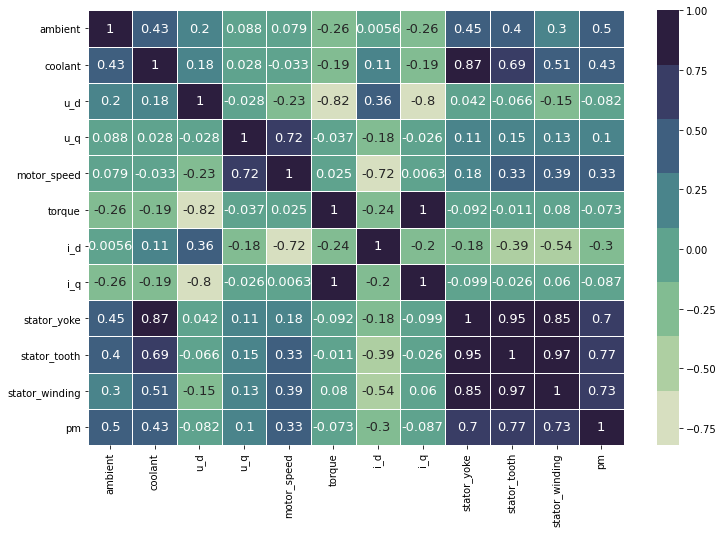

In [9]:
# checking the correlation (Pearson's coeff)
corr_matrix = dataset.corr()
f,ax  = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True,linewidths=.5,annot_kws={"size": 13}, ax=ax, cmap = sns.cubehelix_palette(8, start=.5, rot=-.75))
plt.show()

### Method 1 [ Remove only those variable who have high linear correlation with target variables]

In [10]:
# linear correlation for "pm" target

cpm = corr_matrix["pm"].sort_values(ascending=False)
print("correlation for ")
cpm[cpm >= 0.5] # 0.5 for medium or high linear correlation

correlation for 


pm                1.000000
stator_tooth      0.768570
stator_winding    0.729916
stator_yoke       0.695267
ambient           0.501772
Name: pm, dtype: float64

In [11]:
## So we vcan remove stator_tooth ,stator_winding,stator_yoke from dataset       

In [12]:
dataset_drop_correlation_method_1 = dataset.drop(dataset[['stator_tooth' , 'stator_winding','stator_yoke']], axis=1)
print(dataset_drop_correlation_method_1.head())

    ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
2 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
3 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   
4 -0.762936 -1.116955  0.334901 -1.303017    -1.222429 -0.248197  1.031031   

        i_q        pm  
0 -0.245860 -2.522071  
1 -0.245818 -2.522673  
2 -0.246955 -2.521639  
3 -0.246610 -2.521900  
4 -0.246341 -2.522203  


### Method 2 [ Remove only those variable who have high linear correlation with all the variables]

In [13]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                ambient  coolant       u_d       u_q  motor_speed    torque  \
ambient             NaN  0.43407  0.195035  0.087877     0.078842 -0.262591   
coolant             NaN      NaN  0.178710  0.027681    -0.032963 -0.189276   
u_d                 NaN      NaN       NaN -0.027819    -0.234200 -0.821098   
u_q                 NaN      NaN       NaN       NaN     0.717111 -0.037028   
motor_speed         NaN      NaN       NaN       NaN          NaN  0.024583   
torque              NaN      NaN       NaN       NaN          NaN       NaN   
i_d                 NaN      NaN       NaN       NaN          NaN       NaN   
i_q                 NaN      NaN       NaN       NaN          NaN       NaN   
stator_yoke         NaN      NaN       NaN       NaN          NaN       NaN   
stator_tooth        NaN      NaN       NaN       NaN          NaN       NaN   
stator_winding      NaN      NaN       NaN       NaN          NaN       NaN   
pm                  NaN      NaN       NaN       NaN

In [14]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['i_q', 'stator_winding']


In [15]:
#dataset[['i_q', 'stator_winding']]

In [16]:
dataset_drop_correlation = dataset.drop(dataset[['i_q', 'stator_winding']], axis=1)
print(dataset_drop_correlation.head())

    ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
2 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
3 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   
4 -0.762936 -1.116955  0.334901 -1.303017    -1.222429 -0.248197  1.031031   

   stator_yoke  stator_tooth        pm  
0    -1.831422     -2.066143 -2.522071  
1    -1.830400     -2.064073 -2.522673  
2    -1.830333     -2.063137 -2.521639  
3    -1.830498     -2.062795 -2.521900  
4    -1.831931     -2.062549 -2.522203  


In [17]:
dataset_drop_correlation.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,stator_yoke,stator_tooth,pm
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-1.831422,-2.066143,-2.522071
1,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-1.830400,-2.064073,-2.522673
2,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-1.830333,-2.063137,-2.521639
3,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-1.830498,-2.062795,-2.521900
4,-0.762936,-1.116955,0.334901,-1.303017,-1.222429,-0.248197,1.031031,-1.831931,-2.062549,-2.522203


## Plot

## HISTOGRAM to check the data  is normally distributed

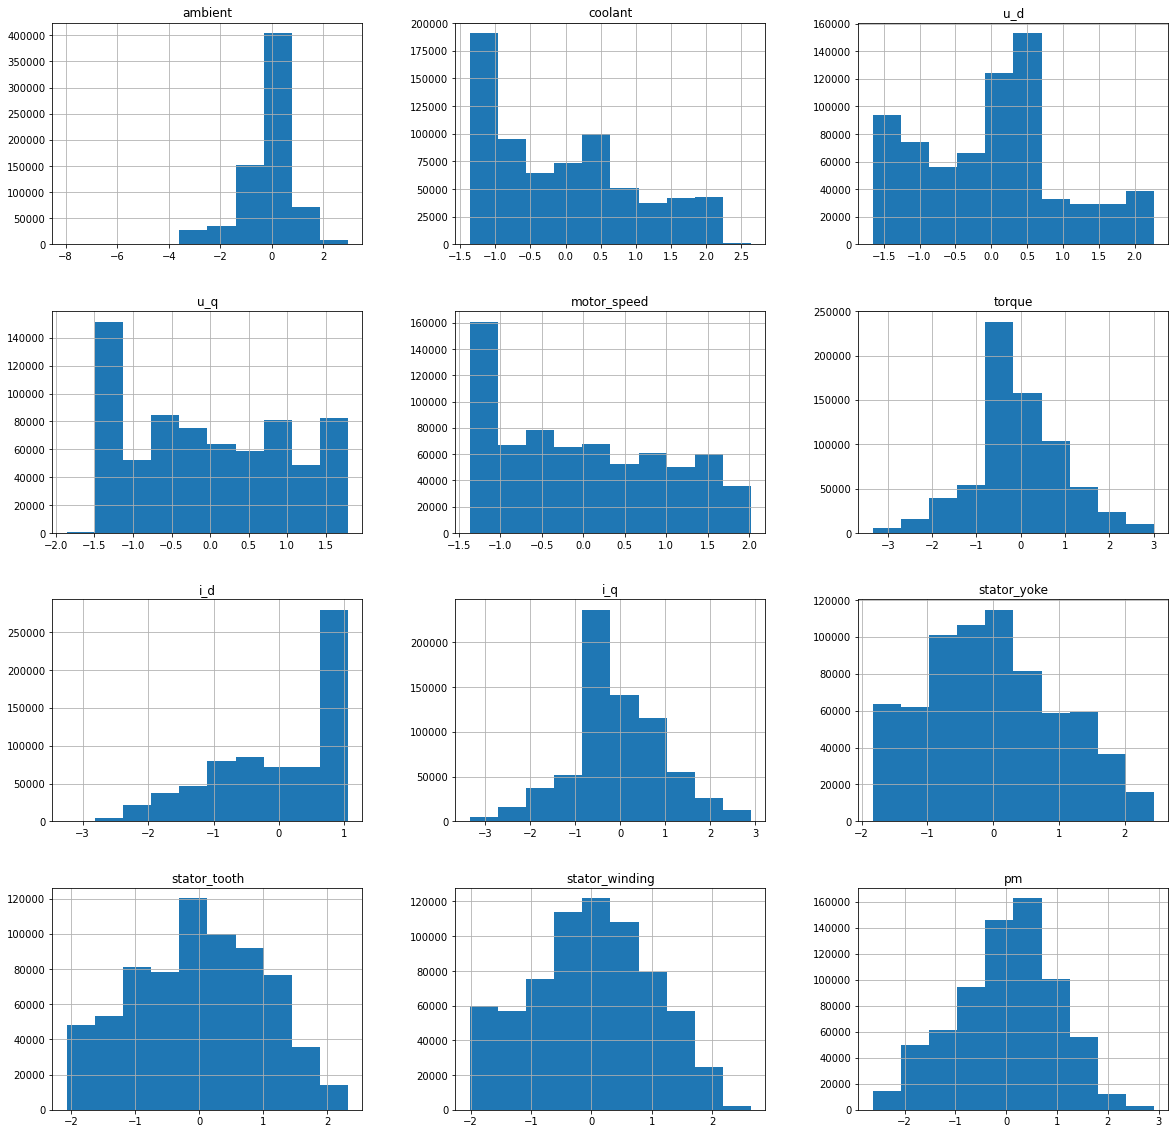

In [18]:
dataset.hist(figsize = (20,20))
plt.show()

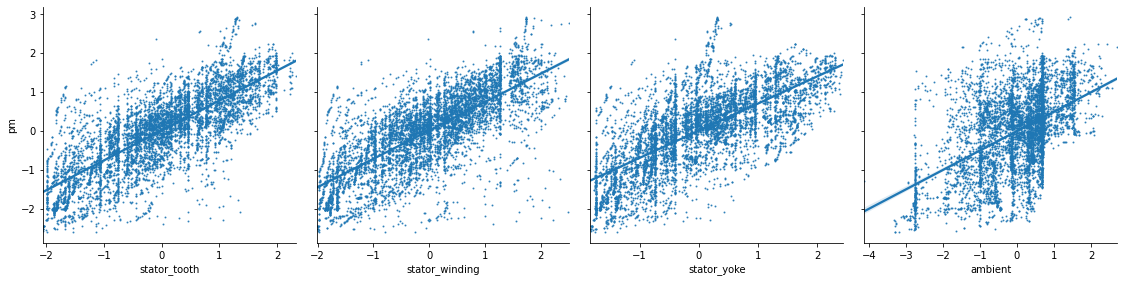

In [19]:
g = sns.PairGrid(dataset.sample(frac=0.01), y_vars=["pm"],
                 x_vars=["stator_tooth", "stator_winding", "stator_yoke", "ambient"], height=4, palette="GnBu_d")

g.map(sns.regplot, scatter_kws={'s':1});

In [20]:
column = ["stator_tooth", "stator_winding", "stator_yoke", "ambient"]

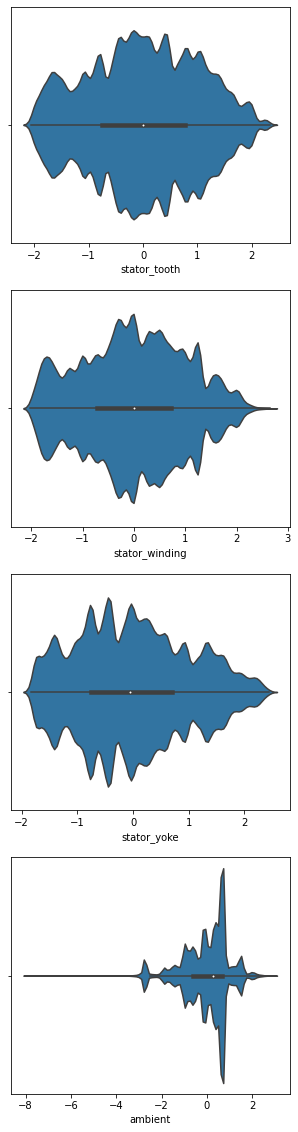

In [21]:
fig, axes = plt.subplots(nrows=4, figsize=(5,20))
fig.subplots_adjust(hspace=0.2)

for (ax, i) in zip(axes, column):
    sns.violinplot(x=dataset[i], ax=ax)
    plt.plot()

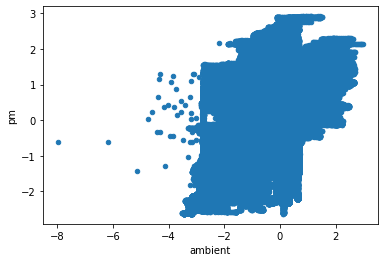

In [22]:
dataset.plot(kind='scatter', x='ambient', y='pm') ;
plt.show()

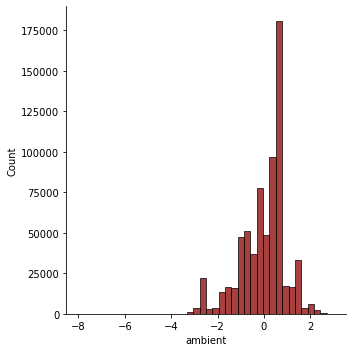

In [23]:
sns.displot(dataset['ambient'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

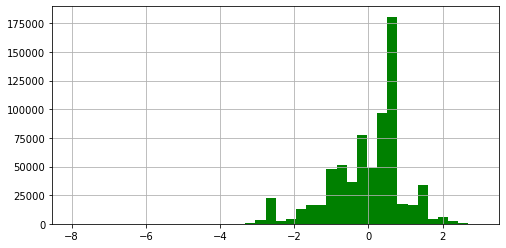

In [24]:
dataset['ambient'].hist(color='green',bins=40,figsize=(8,4))

## Missing Data

In [25]:
dataset.isnull()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
698644,False,False,False,False,False,False,False,False,False,False,False,False
698645,False,False,False,False,False,False,False,False,False,False,False,False
698646,False,False,False,False,False,False,False,False,False,False,False,False
698647,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

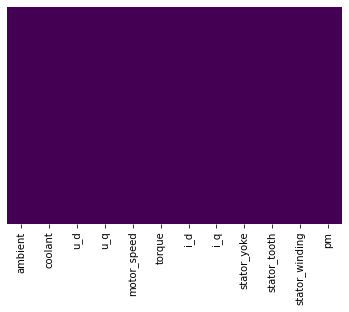

In [26]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
dataset.isnull().sum().sort_values(ascending=False)

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
stator_yoke       0
stator_tooth      0
stator_winding    0
pm                0
dtype: int64

## Outlier analysis

In [28]:
# Interquartile Range Method

s = dataset['ambient']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

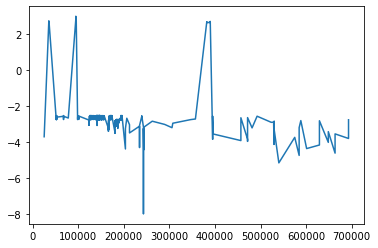

In [29]:
plt.plot(s[(s < iqr_lower) | (s > iqr_upper)])

In [30]:
def outlier_label(x, lower, upper):
    if (lower >= x) or (x >= upper):
        return 'Yes'
    else:
        
        return 'No'

In [31]:
columns_to_check = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed','torque', 'i_d', 'i_q', 'stator_yoke', 'stator_tooth','stator_winding']

for col in columns_to_check:
    quartile_01, quartile_03 = np.percentile(dataset[col], [25, 75])
    iqr = quartile_03 - quartile_01
    
    lower_bound = quartile_01 -(1.5 * iqr)
    upper_bound = quartile_03 +(1.5 * iqr)
    
    dataset['outlier'] = dataset[col].apply(lambda x: outlier_label(x, lower_bound, upper_bound))
    print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

The lower and upper bound of the range for 'ambient' respectively is: -2.5254989 and 2.6140139000000002
The lower and upper bound of the range for 'coolant' respectively is: -3.56736355 and 3.17798965
The lower and upper bound of the range for 'u_d' respectively is: -2.6067676 and 2.1375972
The lower and upper bound of the range for 'u_q' respectively is: -3.599002325 and 3.5236853949999998
The lower and upper bound of the range for 'motor_speed' respectively is: -3.66284595 and 3.5663650099999997
The lower and upper bound of the range for 'torque' respectively is: -1.48769742 and 1.76855114
The lower and upper bound of the range for 'i_d' respectively is: -3.41284475 and 3.6700668500000004
The lower and upper bound of the range for 'i_q' respectively is: -1.39260407 and 1.63495905
The lower and upper bound of the range for 'stator_yoke' respectively is: -2.91383205 and 2.86418995
The lower and upper bound of the range for 'stator_tooth' respectively is: -3.0633999000000003 and 3.07379

In [32]:
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) 
           & (df[name] < quant_df.loc[high, name])]
    return df


In [33]:
dataset_no_outlier_value=remove_outlier(dataset)

In [34]:
dataset_no_outlier_value.shape

(293190, 13)

In [35]:
type(dataset_no_outlier_value)

pandas.core.frame.DataFrame

In [36]:
dataset_no_outlier_value=dataset_no_outlier_value.drop(['outlier'], axis = 1)

In [37]:
dataset_no_outlier_value.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
5015,-0.601064,-1.081462,0.291149,0.892751,-0.140246,-0.260990,1.029126,-0.245705,-0.937971,-0.840746,-0.976796,0.966119
5028,-0.618168,-1.081584,0.290983,0.893145,-0.140247,-0.261201,1.029141,-0.245716,-0.958372,-0.880802,-0.976972,0.937190
5029,-0.614427,-1.079631,0.291079,0.892788,-0.140246,-0.261235,1.029132,-0.245709,-0.959685,-0.882862,-0.977027,0.935620
5031,-0.604584,-1.078171,0.291132,0.893434,-0.140243,-0.261142,1.029140,-0.245730,-0.962458,-0.887689,-0.977085,0.932074
5039,-0.835352,-1.080473,0.290626,0.893210,-0.140246,-0.261326,1.029128,-0.245713,-0.985661,-0.907300,-0.993440,0.903991


In [38]:
dataset.shape

(698649, 13)

## Detecting Multicollinearity with VIF

In [39]:
# the independent variables set
X = dataset[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed','torque', 'i_d', 'i_q', 'stator_yoke', 'stator_tooth','stator_winding']]
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [vif(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature         VIF
0          ambient    1.419343
1          coolant   40.925697
2              u_d    5.035322
3              u_q    5.023655
4      motor_speed   13.416578
5           torque  262.735181
6              i_d    8.836420
7              i_q  231.223773
8      stator_yoke  393.060905
9     stator_tooth  624.460055
10  stator_winding  153.544821


In [40]:
iv = dataset[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed',
       'torque', 'i_d', 'i_q', 'stator_yoke', 'stator_tooth',
       'stator_winding']].columns

X = dataset[iv]
  
# compare with each columns
[vif(dataset[iv].values, index) for index in range(len(iv))] 
  
# compare with each columns
for i in range(len(iv)):
    vif_list = [vif(dataset[iv].values, index) for index in range(len(iv))] 
    maxvif = max(vif_list)
    print("Max VIF value is ", maxvif)                      
    drop_index = vif_list.index(maxvif)
    print("For Independent variable", iv[drop_index])
     
    if maxvif > 20:
         
        print("Deleting", iv[drop_index])
        iv = iv.delete(drop_index)
        print("Final Independent_variables ", iv)


Max VIF value is  624.4600554313168
For Independent variable stator_tooth
Deleting stator_tooth
Final Independent_variables  Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'stator_yoke', 'stator_winding'],
      dtype='object')
Max VIF value is  261.6854342930114
For Independent variable torque
Deleting torque
Final Independent_variables  Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q',
       'stator_yoke', 'stator_winding'],
      dtype='object')
Max VIF value is  73.39193135510105
For Independent variable stator_yoke
Deleting stator_yoke
Final Independent_variables  Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q',
       'stator_winding'],
      dtype='object')
Max VIF value is  10.69890667439264
For Independent variable motor_speed
Max VIF value is  10.69890667439264
For Independent variable motor_speed
Max VIF value is  10.69890667439264
For Independent variable motor_speed
Max VIF value is  10

## EDA using pandas_profiling

In [41]:
#profile = ProfileReport(dataset, title='Regression Pandas Profiling Report', explorative=True)

In [42]:
#profile.to_widgets()

In [43]:
#profile.to_file("regression_output_report_pandas_profiling.html")

## EDA using sweetviz

In [44]:
#my_report = sweetviz.analyze([dataset, "Train"],target_feat='pm')

In [45]:
#my_report.show_html('regression_eda_output_report_sweetviz.html')

## EDA using pandas_visual_analysis

In [46]:
#VisualAnalysis(dataset)

## EDA using Dtale

In [47]:
#dtale.show(dataset)

## Split data into train & test

In [48]:
# choosing all features

X_1=dataset[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed',
           'torque', 'i_d', 'i_q','stator_yoke', 'stator_tooth','stator_winding']]

y_1= dataset[['pm']]

# Create a model and train it

## Scaling features

In [49]:
ss = preprocessing.StandardScaler()

X_1= ss.fit_transform(X_1)

## Splitting the dataset into the Training set and Test set

In [50]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)

## Linear Regression

## 1st model

In [51]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_1_train, y_1_train)

# Predicting the Test set results
y_pred = regressor.predict(X_1_test)

score=r2_score(y_1_test,y_pred)

print("accuracy score",score)

accuracy score 0.7724511997409498


In [52]:
X_test=[['-0.75214297','-1.1184461','0.3279352','-1.2978575','-1.2224282','-0.2501821','1.0295724','-0.24586003','-1.8314217','-2.0661428','-2.0180326']]

# Predicting the Test set results
y_pred_new = regressor.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new)

pridicted values of pm based on given variables [[-1.61182704]]


c:\users\amit jain\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



In [53]:
X_test=[['-0.1533763','0.4364797','2.233154','-0.7633086','0.8685327','-1.703007','-1.886732','-1.511974','0.6045675','0.6515232','0.581081']]

# Predicting the Test set results
y_pred_new = regressor.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new)

pridicted values of pm based on given variables [[0.65329012]]


c:\users\amit jain\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



In [54]:
# linear regression feature importance

importance = regressor.coef_

print(list(zip(X.columns.tolist(),importance[0])))

print(pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":importance[0]}))

[('ambient', 0.21628939706916275), ('coolant', -0.2678498180514821), ('u_d', -0.035408277227414235), ('u_q', -0.34493919762313935), ('motor_speed', 0.3343860457252063), ('torque', 0.003046706977547027), ('i_d', 0.18009031785281862), ('i_q', 0.013912429152178565), ('stator_yoke', -1.5537883326348292), ('stator_tooth', 4.537728079687539), ('stator_winding', -2.268089543789041)]
           Feature  Coefficients
0          ambient      0.216289
1          coolant     -0.267850
2              u_d     -0.035408
3              u_q     -0.344939
4      motor_speed      0.334386
5           torque      0.003047
6              i_d      0.180090
7              i_q      0.013912
8      stator_yoke     -1.553788
9     stator_tooth      4.537728
10  stator_winding     -2.268090


### 2nd model

In [55]:
# features based on correlation analysis

X_2=dataset[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed',
       'torque', 'i_d', 'stator_yoke', 'stator_tooth']]

y_2= dataset[['pm']]

In [56]:
X_2= ss.fit_transform(X_2)

In [57]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.2, random_state = 0)

In [58]:
# Fitting Multiple Linear Regression to the Training set

regressor_2 = LinearRegression()
regressor_2.fit(X_2_train, y_2_train)

# Predicting the Test set results
y_pred = regressor_2.predict(X_2_test)

score=r2_score(y_2_test,y_pred)

print("accuracy score",score)

accuracy score 0.7368473501638787


In [59]:
X_test=[['-0.75214297','-1.1184461','0.3279352','-1.2978575','-1.2224282','-0.2501821','1.0295724','-1.8314217','-2.0661428']]

# Predicting the Test set results
y_pred_new = regressor_2.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new)

pridicted values of pm based on given variables [[-1.48503927]]


c:\users\amit jain\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



## 3rd Model

In [60]:
# features based on Multi-collinearity

X_3=dataset[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q','stator_winding']]

y_3= dataset[['pm']]

In [61]:
X_3= ss.fit_transform(X_3)

In [62]:
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size = 0.2, random_state = 100)

In [63]:
# Fitting Multiple Linear Regression to the Training set

regressor_3 = LinearRegression()
regressor_3.fit(X_3_train, y_3_train)

# Predicting the Test set results
y_pred = regressor_3.predict(X_3_test)

score=r2_score(y_3_test,y_pred)

print("accuracy score",score)

accuracy score 0.7008534035351976


In [64]:
X_test=[['-0.75214297','-1.1184461','0.3279352','-1.2978575','-1.2224282','1.0295724','-0.24586003','-2.0180326']]

# Predicting the Test set results
y_pred_new = regressor_3.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new)

pridicted values of pm based on given variables [[-1.39632223]]


c:\users\amit jain\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



## model 4 RFE with linear regressor

In [65]:
# running RFE with number of features=5

regressor_4 = LinearRegression()
regressor_4.fit(X_1_train, y_1_train)

rfe = RFE(regressor_4, n_features_to_select=5)             
rfe = rfe.fit(X_1_train, y_1_train)

list(zip(X.columns,rfe.support_,rfe.ranking_))

[('ambient', True, 1),
 ('coolant', False, 2),
 ('u_d', False, 5),
 ('u_q', True, 1),
 ('motor_speed', False, 3),
 ('torque', False, 7),
 ('i_d', False, 4),
 ('i_q', False, 6),
 ('stator_yoke', True, 1),
 ('stator_tooth', True, 1),
 ('stator_winding', True, 1)]

In [66]:
# predict prices of X_test

y_pred = rfe.predict(X_1_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_1_test, y_pred)
print(r2)

0.7594390646402165


In [67]:
X_test=[['-0.1533763','0.4364797','2.233154','-0.7633086','0.8685327','-1.703007','-1.886732','-1.511974','0.6045675','0.6515232','0.581081']]

# Predicting the Test set results
y_pred_new = regressor_4.predict(X_test)

print("pridicted values of pm based on given variables",y_pred_new)

pridicted values of pm based on given variables [[0.65329012]]


c:\users\amit jain\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



## model 5 

In [68]:
# k-fold CV (using all the 13 variables)
regressor_5 = LinearRegression()
scores = cross_val_score(regressor_5, X_1_train, y_1_train, scoring='r2', cv=10)
scores    

array([0.76887465, 0.77703634, 0.77310646, 0.7712113 , 0.77230783,
       0.77031778, 0.77538177, 0.77187246, 0.76979498, 0.77277782])

In [69]:
len(X.columns)

11

## model 6 hyper parameter tuning

In [70]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 12))}]


# step-3: perform grid search
# 3.1 specify model
regressor_6 = LinearRegression()
regressor_6.fit(X_1_train, y_1_train)
rfe = RFE(regressor_6)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_1_train, y_1_train)    

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]}],
             return_train_score=True, scoring='r2', verbose=1)

In [71]:

# Predicting the Test set results
y_pred = regressor_6.predict(X_1_test)

score=r2_score(y_1_test,y_pred)

print("accuracy score",score)

accuracy score 0.7724511997409498


In [72]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.804772,0.026535,0.013606,0.004363,1,{'n_features_to_select': 1},0.591221,0.591544,0.592574,0.587853,...,0.590954,0.001615,11,0.590893,0.590814,0.590553,0.591734,0.590805,0.590960,0.000404
1,1.772817,0.033555,0.013271,0.007060,2,{'n_features_to_select': 2},0.593575,0.593698,0.594929,0.590019,...,0.593117,0.001642,10,0.593013,0.592983,0.592671,0.593900,0.593064,0.593126,0.000411
2,1.719715,0.021570,0.016149,0.003193,3,{'n_features_to_select': 3},0.704057,0.704857,0.704767,0.702762,...,0.703968,0.000802,9,0.703953,0.703755,0.703775,0.704276,0.704118,0.703975,0.000200
3,1.649359,0.016042,0.020027,0.000438,4,{'n_features_to_select': 4},0.737172,0.736832,0.737351,0.734792,...,0.736328,0.001007,8,0.736126,0.736212,0.736080,0.736719,0.736546,0.736337,0.000252
4,1.521137,0.024824,0.024189,0.005258,5,{'n_features_to_select': 5},0.760904,0.760408,0.760247,0.758103,...,0.759743,0.001021,7,0.759460,0.759584,0.759622,0.760158,0.759922,0.759749,0.000255
5,1.414359,0.026285,0.020906,0.002273,6,{'n_features_to_select': 6},0.760951,0.760484,0.760327,0.758205,...,0.759818,0.001007,6,0.759543,0.759660,0.759697,0.760228,0.759999,0.759826,0.000251
6,1.248848,0.022332,0.025244,0.004056,7,{'n_features_to_select': 7},0.768167,0.767891,0.767397,0.765170,...,0.767010,0.001094,5,0.766730,0.766799,0.766921,0.767477,0.767164,0.767018,0.000273
7,1.075694,0.011310,0.025231,0.003877,8,{'n_features_to_select': 8},0.771302,0.771183,0.770606,0.768356,...,0.770196,0.001113,4,0.769928,0.769958,0.770101,0.770663,0.770370,0.770204,0.000278
8,0.893838,0.051669,0.027530,0.003720,9,{'n_features_to_select': 9},0.773258,0.773268,0.772580,0.770453,...,0.772204,0.001095,3,0.771950,0.771948,0.772119,0.772650,0.772399,0.772213,0.000273
9,0.649954,0.020625,0.031557,0.002622,10,{'n_features_to_select': 10},0.773352,0.773300,0.772657,0.770537,...,0.772277,0.001088,2,0.772019,0.772031,0.772192,0.772722,0.772473,0.772287,0.000272


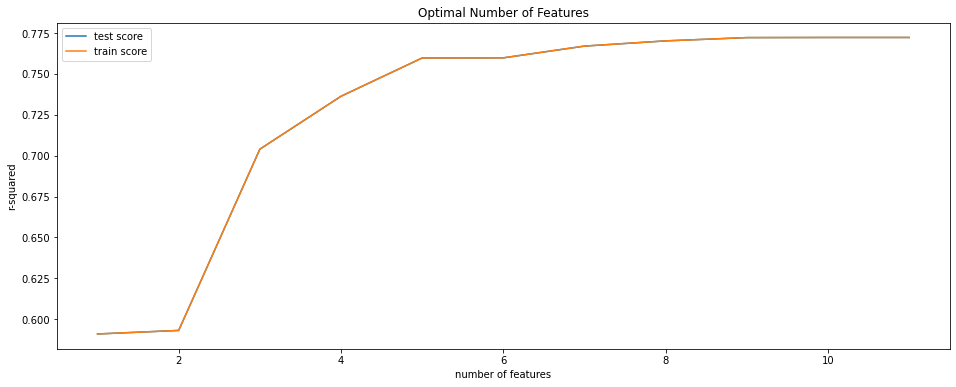

In [73]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [74]:
# final model
n_features_optimal = 8

regressor_7 = LinearRegression()
regressor_7.fit(X_1_train, y_1_train)

rfe = RFE(regressor_7, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_1_train, y_1_train)

# predict prices of X_test
y_pred = regressor_7.predict(X_1_test)
r2 = sklearn.metrics.r2_score(y_1_test, y_pred)
print(r2)

0.7724511997409498


## model 7

In [75]:
# choosing all features

X_4=dataset_no_outlier_value[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed',
           'torque', 'i_d', 'i_q','stator_yoke', 'stator_tooth','stator_winding']]

y_4= dataset_no_outlier_value[['pm']]

In [76]:
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size = 0.2, random_state = 42)

In [77]:
# Fitting Multiple Linear Regression to the Training set

regressor_8 = LinearRegression()
regressor_8.fit(X_4_train, y_4_train)

# Predicting the Test set results
y_pred = regressor.predict(X_4_test)

score=r2_score(y_4_test,y_pred)

print("accuracy score",score)

accuracy score 0.6363242997347469


## model 8

In [78]:
X_5= ss.fit_transform(X_4)

In [79]:
y_5= dataset_no_outlier_value[['pm']]

In [80]:
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, test_size = 0.2, random_state = 42)

In [81]:
# Fitting Multiple Linear Regression to the Training set

regressor_9 = LinearRegression()
regressor_9.fit(X_5_train, y_5_train)

# Predicting the Test set results
y_pred = regressor.predict(X_5_test)

score=r2_score(y_5_test,y_pred)

print("accuracy score",score)

accuracy score 0.5254183372257462
